In [1]:
# Reload the dataset
import pandas as pd

# Load the feature-engineered dataset from the processed folder
feature_engineered_data_path = "C:/project/Freight_Analysis_Framework-/data/processed/freight_analysis_feature_engineered.csv"
regional_data = pd.read_csv(feature_engineered_data_path)

# Step 1: Identify Missing Values
print("Missing values per column (before handling):")
print(regional_data.isnull().sum())

# Step 2: Handle Missing Values
# For numerical columns, fill with the column mean
numerical_columns = regional_data.select_dtypes(include=['float64', 'int64']).columns
regional_data[numerical_columns] = regional_data[numerical_columns].fillna(regional_data[numerical_columns].mean())

# For categorical columns, fill with the mode
categorical_columns = regional_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    regional_data[col].fillna(regional_data[col].mode()[0], inplace=True)

# Step 3: Verify Missing Values
print("\nMissing values per column (after handling):")
print(regional_data.isnull().sum().sum())

# Save the cleaned dataset back for modeling
cleaned_data_path = "C:/project/Freight_Analysis_Framework-/data/processed/freight_analysis_cleaned.csv"
regional_data.to_csv(cleaned_data_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_data_path}.")


Missing values per column (before handling):
fr_orig           0
dms_orig          0
dms_dest          0
fr_dest           0
dms_mode          0
                 ..
fr_outmode_3.0    0
fr_outmode_4.0    0
fr_outmode_5.0    0
fr_outmode_6.0    0
fr_outmode_7.0    0
Length: 64, dtype: int64


C:\Users\om\AppData\Local\Temp\ipykernel_13116\2603254151.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  regional_data[col].fillna(regional_data[col].mode()[0], inplace=True)



Missing values per column (after handling):
0

Cleaned dataset saved to C:/project/Freight_Analysis_Framework-/data/processed/freight_analysis_cleaned.csv.


In [2]:
# Reload the cleaned dataset
cleaned_data_path = "C:/project/Freight_Analysis_Framework-/data/processed/freight_analysis_cleaned.csv"
regional_data_cleaned = pd.read_csv(cleaned_data_path)

# Check the first few rows to ensure it loaded correctly
print("First few rows of the cleaned dataset:")
print(regional_data_cleaned.head())



First few rows of the cleaned dataset:
   fr_orig  dms_orig  dms_dest  fr_dest  dms_mode  sctg2  trade_type  \
0    804.0        11        11    801.0         1      1           1   
1    804.0        11        19    801.0         1      1           1   
2    804.0        11       129    801.0         1      1           1   
3    804.0        11       131    801.0         1      1           1   
4    804.0        11       139    801.0         1      1           1   

   tons_2012  tons_2013  tons_2014  ...  fr_inmode_4.0  fr_inmode_5.0  \
0     0.3231    18.2865    19.7980  ...          False          False   
1     0.3231   218.1548   220.2783  ...          False          False   
2     0.3231     0.8870     0.8371  ...          False          False   
3     0.3231     6.5007     5.7015  ...          False          False   
4     0.3231     2.8717     2.4586  ...          False          False   

   fr_inmode_6.0  fr_inmode_7.0  fr_outmode_2.0  fr_outmode_3.0  \
0          False      

In [3]:
col_dtypes=regional_data_cleaned.dtypes
object_columns=col_dtypes[col_dtypes=='object'].index.tolist()
object_columns

['Volume_Category_2012', 'Value_Category_2012']

In [4]:
# One-hot encode the object columns
regional_data_cleaned = pd.get_dummies(regional_data_cleaned, columns=['Volume_Category_2012', 'Value_Category_2012'], drop_first=True)

# Verify the changes
print("Dataset after encoding object columns:")
print(regional_data_cleaned.info())


Dataset after encoding object columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660972 entries, 0 to 1660971
Data columns (total 62 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   fr_orig                            1660972 non-null  float64
 1   dms_orig                           1660972 non-null  int64  
 2   dms_dest                           1660972 non-null  int64  
 3   fr_dest                            1660972 non-null  float64
 4   dms_mode                           1660972 non-null  int64  
 5   sctg2                              1660972 non-null  int64  
 6   trade_type                         1660972 non-null  int64  
 7   tons_2012                          1660972 non-null  float64
 8   tons_2013                          1660972 non-null  float64
 9   tons_2014                          1660972 non-null  float64
 10  tons_2015                          1660972 non-null

In [5]:
col_dtypes=regional_data_cleaned.dtypes
object_columns=col_dtypes[col_dtypes=='object'].index.tolist()
object_columns

[]

In [6]:
# Define features (X) and target (y)
X = regional_data_cleaned.drop(columns=['value_2012'])  # Assuming 'value_2012' is the target
y = regional_data_cleaned['value_2012']

# Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes of the datasets
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Features (X) shape: (1660972, 61)
Target (y) shape: (1660972,)
Training set shape: X_train: (1328777, 61), y_train: (1328777,)
Testing set shape: X_test: (332195, 61), y_test: (332195,)


In [7]:
import numpy as np

# Check for infinite values in X_train
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())

# Replace infinite values with NaN, then fill NaN with the column mean
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

# Verify the data again
print("Infinite values in X_train (after handling):", np.isinf(X_train).sum().sum())
print("Missing values in X_train (after handling):", X_train.isnull().sum().sum())


Infinite values in X_train: 979115
Infinite values in X_train (after handling): 0
Missing values in X_train (after handling): 0


In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder  # For potential target encoding

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# ------------------- Linear Regression -------------------
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model - calculate RMSE, R-squared 
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# If your target variable is categorical (for classification)
if isinstance(y_train[0], str) or not isinstance(y_train[0], (int, float)):
    # Encode target variable
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    # Predict on encoded target
    y_pred_lr_encoded = lr_model.predict(X_test)

    # Calculate accuracy score
    acc_lr = accuracy_score(y_test_encoded, np.round(y_pred_lr_encoded))  # Round predictions for classification
else:
    # For regression tasks, accuracy score is not typically used
    acc_lr = None 


# ------------------- Ridge Regression -------------------
# Initialize the model with an alpha value (regularization parameter)
# Experiment with different alpha values to find the optimal one
ridge_model = Ridge(alpha=1.0)  # Replace 1.0 with your chosen alpha

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model - calculate RMSE and R-squared
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

# If your target variable is categorical
if isinstance(y_train[0], str) or not isinstance(y_train[0], (int, float)):
    # Predict on encoded target
    y_pred_ridge_encoded = ridge_model.predict(X_test)

    # Calculate accuracy score
    acc_ridge = accuracy_score(y_test_encoded, np.round(y_pred_ridge_encoded)) 
else:
    acc_ridge = None


# ------------------- Lasso Regression -------------------
# Initialize the model with an alpha value (regularization parameter)
# Experiment with different alpha values to find the optimal one
lasso_model = Lasso(alpha=0.1)  # Replace 0.1 with your chosen alpha

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model - calculate RMSE and R-squared
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# If your target variable is categorical
if isinstance(y_train[0], str) or not isinstance(y_train[0], (int, float)):
    # Predict on encoded target
    y_pred_lasso_encoded = lasso_model.predict(X_test)

    # Calculate accuracy score
    acc_lasso = accuracy_score(y_test_encoded, np.round(y_pred_lasso_encoded)) 
else:
    acc_lasso = None


# Output the evaluation metrics
print("Linear Regression:")
print(f"\tRMSE: {rmse_lr:.4f}")
print(f"\tR-squared: {r2_lr:.4f}")
print(f"\tAccuracy: {acc_lr:.4f}" if acc_lr is not None else "Not Applicable")

print("\nRidge Regression:")
print(f"\tRMSE: {rmse_ridge:.4f}")
print(f"\tR-squared: {r2_ridge:.4f}")
print(f"\tAccuracy: {acc_ridge:.4f}" if acc_ridge is not None else "Not Applicable")

print("\nLasso Regression:")
print(f"\tRMSE: {rmse_lasso:.4f}")
print(f"\tR-squared: {r2_lasso:.4f}")
print(f"\tAccuracy: {acc_lasso:.4f}" if acc_lasso is not None else "Not Applicable")

Linear Regression:
	RMSE: 0.0597
	R-squared: 0.9948
Not Applicable

Ridge Regression:
	RMSE: 0.0597
	R-squared: 0.9948
Not Applicable

Lasso Regression:
	RMSE: 0.2443
	R-squared: 0.9125
Not Applicable


High R-squared for Linear and Ridge: Both Linear Regression and Ridge Regression exhibit exceptionally high R-squared values (0.9948). This suggests a very strong linear relationship between the features and the target variable in your dataset.
Similar RMSE for Linear and Ridge: The RMSE values for Linear and Ridge Regression are nearly identical (0.0597). This indicates that both models perform similarly well in terms of prediction accuracy.
Lasso Performance:
Lower R-squared: Lasso Regression has a significantly lower R-squared (0.9125) compared to Linear and Ridge. This suggests that Lasso may be oversimplifying the model, potentially due to its feature selection property.
Higher RMSE: The higher RMSE (0.2443) for Lasso indicates that its predictions are less accurate than Linear and Ridge Regression in this case.


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# ------------------- Lasso Regression -------------------
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Feature Importance
lasso_coefs = lasso_model.coef_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_coefs})
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)
print(feature_importance)

# ------------------- Hyperparameter Tuning (Reduced Search Space) -------------------
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
lasso_params = {'alpha': [0.01, 0.1, 1.0]}

ridge_grid = GridSearchCV(estimator=Ridge(), param_grid=ridge_params, scoring='neg_mean_squared_error', cv=3)
lasso_grid = GridSearchCV(estimator=Lasso(), param_grid=lasso_params, scoring='neg_mean_squared_error', cv=3)

ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_['alpha'])
print("Best Lasso alpha:", lasso_grid.best_params_['alpha'])

# ------------------- Model Training and Evaluation (Using Best Parameters) -------------------
best_ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])
best_lasso = Lasso(alpha=lasso_grid.best_params_['alpha'])

best_ridge.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)

y_pred_ridge = best_ridge.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regression:")
print(f"\tRMSE: {rmse_ridge:.4f}")
print(f"\tR-squared: {r2_ridge:.4f}")

print("\nLasso Regression:")
print(f"\tRMSE: {rmse_lasso:.4f}")
print(f"\tR-squared: {r2_lasso:.4f}")

                   Feature  Coefficient
46  Log_Freight_Value_2012     1.330464
38             curval_2015     0.000271
37             curval_2014    -0.000127
35             tmiles_2045     0.000074
17              value_2013     0.000024
..                     ...          ...
56          fr_outmode_3.0    -0.000000
57          fr_outmode_4.0     0.000000
58          fr_outmode_5.0    -0.000000
59          fr_outmode_6.0     0.000000
60          fr_outmode_7.0    -0.000000

[61 rows x 2 columns]


c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.617e+02, tolerance: 6.059e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.629e+01, tolerance: 6.061e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Best Ridge alpha: 0.1
Best Lasso alpha: 0.01


c:\Users\om\anaconda3\envs\freig\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+02, tolerance: 9.087e+01
  model = cd_fast.enet_coordinate_descent(


Ridge Regression:
	RMSE: 0.0597
	R-squared: 0.9948

Lasso Regression:
	RMSE: 0.0954
	R-squared: 0.9867


In [10]:
lasso_model = Lasso(alpha=0.1, max_iter=10000)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Assuming you already have your training and testing data (X_train, X_test, y_train, y_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Model Training
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train_scaled, y_train)

# ... rest of your code for feature importance, hyperparameter tuning, etc. (using scaled data)

Lasso(alpha=0.1)

In [12]:
import numpy as np

def regression_accuracy(y_true, y_pred, threshold=0.1):
  """
  Calculates a custom "accuracy" score for regression by 
  checking if the absolute difference between predicted and 
  true values is within a specified threshold.

  Args:
    y_true: True target values.
    y_pred: Predicted values.
    threshold: The allowed difference between true and predicted values.

  Returns:
    Accuracy score: The proportion of predictions within the threshold.
  """
  correct_predictions = np.sum(np.abs(y_true - y_pred) <= threshold)
  total_predictions = len(y_true)
  return correct_predictions / total_predictions

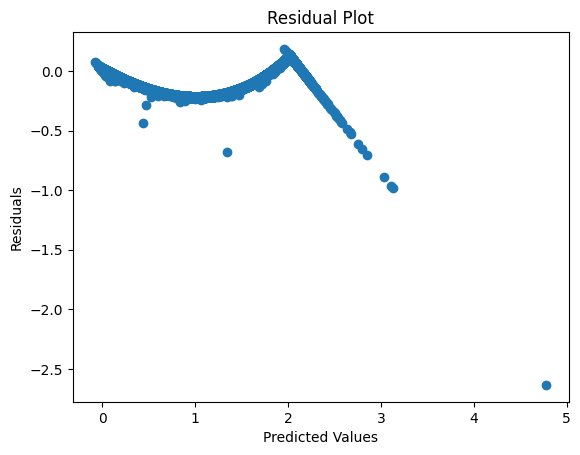

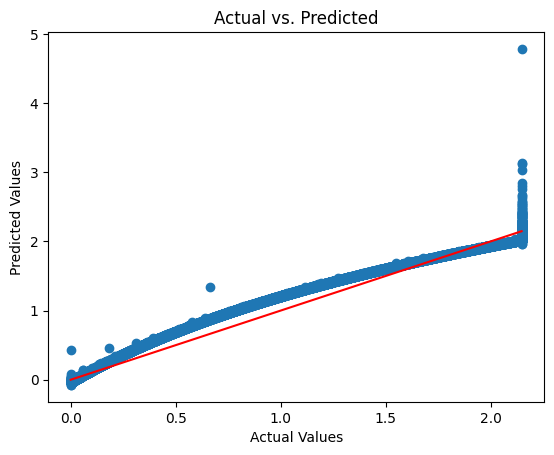

In [15]:
import matplotlib.pyplot as plt

# ... (Your code for model training and prediction) ...

# Residual Plot
residuals = y_test - y_pred_lasso
plt.scatter(y_pred_lasso, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Actual vs. Predicted Plot
plt.scatter(y_test, y_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

# ... (Code for Feature Importance Plot - if applicable) ...

In [16]:
accuracy = regression_accuracy(y_test, y_pred_lasso, threshold=0.1) 
print(f"Custom Accuracy: {accuracy:.4f}")

Custom Accuracy: 0.6505


In [17]:
accuracy = regression_accuracy(y_test, y_pred_ridge, threshold=0.1) 
print(f"Custom Accuracy: {accuracy:.4f}")

Custom Accuracy: 0.8825


In [18]:
accuracy = regression_accuracy(y_test, y_pred_lr, threshold=0.1) 
print(f"Custom Accuracy: {accuracy:.4f}")

Custom Accuracy: 0.8825


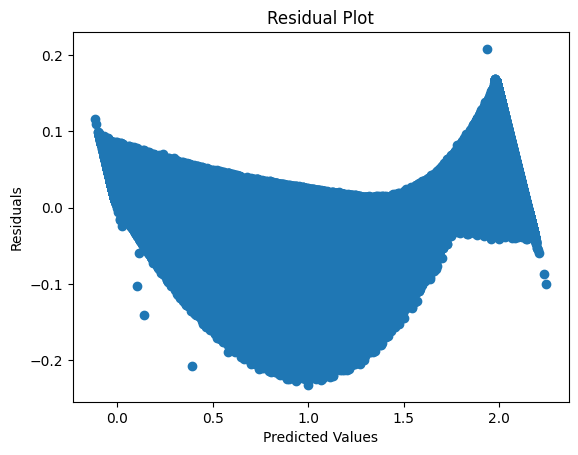

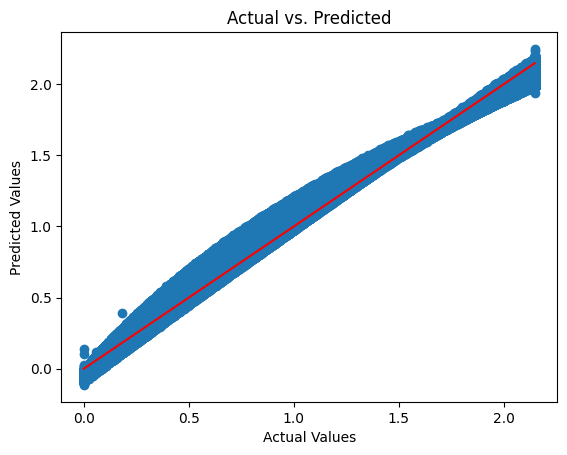

In [19]:
import matplotlib.pyplot as plt

# ... (Your code for model training and prediction) ...

# Residual Plot
residuals = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Actual vs. Predicted Plot
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

# ... (Code for Feature Importance Plot - if applicable) ...

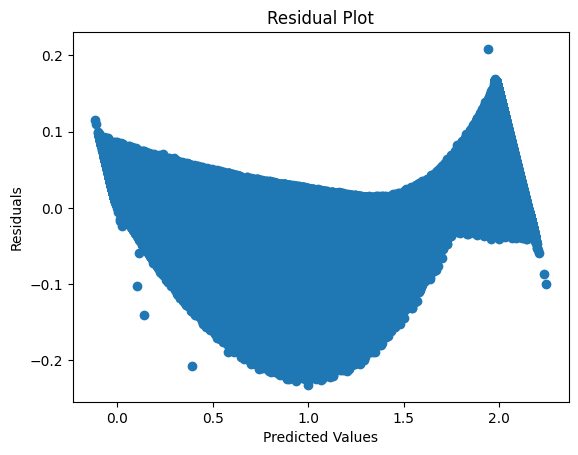

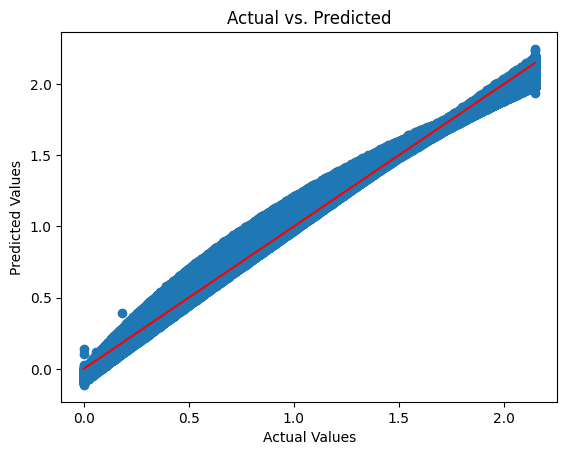

In [20]:
import matplotlib.pyplot as plt

# ... (Your code for model training and prediction) ...

# Residual Plot
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Actual vs. Predicted Plot
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

# ... (Code for Feature Importance Plot - if applicable) ...

In [21]:
import pickle

# Assuming 'best_model' is either 'ridge_model' or 'lr_model' (depending on your preference)
# Since they have the same accuracy in this case, let's choose Ridge for demonstration

best_model = ridge_model 

# Save the model to a file
with open('best_ridge_model.pkl', 'wb') as file:
    pickle.dump(best_model, file) 

# Load the saved model (for later use)
with open('best_ridge_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)